<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-[Chapter-07]-군집화" data-toc-modified-id="1.-[Chapter-07]-군집화-1">1. [Chapter 07] 군집화</a></span><ul class="toc-item"><li><span><a href="#1.1-K-평균-알고리즘-이해" data-toc-modified-id="1.1-K-평균-알고리즘-이해-1.1">1.1 K-평균 알고리즘 이해</a></span><ul class="toc-item"><li><span><a href="#1.1.1-사이킷런-KMeans-클래스-소개" data-toc-modified-id="1.1.1-사이킷런-KMeans-클래스-소개-1.1.1">1.1.1 사이킷런 KMeans 클래스 소개</a></span></li><li><span><a href="#1.1.2-K-평균을-이용한-붓꽃-데이터-세트-군집화" data-toc-modified-id="1.1.2-K-평균을-이용한-붓꽃-데이터-세트-군집화-1.1.2">1.1.2 K-평균을 이용한 붓꽃 데이터 세트 군집화</a></span></li><li><span><a href="#1.1.3-군집화-알고리즘-테스트를-위한-데이터-생성" data-toc-modified-id="1.1.3-군집화-알고리즘-테스트를-위한-데이터-생성-1.1.3">1.1.3 군집화 알고리즘 테스트를 위한 데이터 생성</a></span></li></ul></li><li><span><a href="#1.2-군집-평가" data-toc-modified-id="1.2-군집-평가-1.2">1.2 군집 평가</a></span><ul class="toc-item"><li><span><a href="#1.2.1-실루엣-분석의-개요" data-toc-modified-id="1.2.1-실루엣-분석의-개요-1.2.1">1.2.1 실루엣 분석의 개요</a></span></li><li><span><a href="#1.2.2-붓꽃-데이터-세트를-이용한-군집-평가" data-toc-modified-id="1.2.2-붓꽃-데이터-세트를-이용한-군집-평가-1.2.2">1.2.2 붓꽃 데이터 세트를 이용한 군집 평가</a></span></li><li><span><a href="#1.2.3-군집별-평균-실루엣-계수의-시각화를-통한-군집-개수-최적화-방법" data-toc-modified-id="1.2.3-군집별-평균-실루엣-계수의-시각화를-통한-군집-개수-최적화-방법-1.2.3">1.2.3 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법</a></span></li></ul></li><li><span><a href="#1.3-평균-이동" data-toc-modified-id="1.3-평균-이동-1.3">1.3 평균 이동</a></span></li><li><span><a href="#1.4-GMM(Gaussian-Mixture-Model)" data-toc-modified-id="1.4-GMM(Gaussian-Mixture-Model)-1.4">1.4 GMM(Gaussian Mixture Model)</a></span></li><li><span><a href="#1.5-DBSCAN" data-toc-modified-id="1.5-DBSCAN-1.5">1.5 DBSCAN</a></span></li><li><span><a href="#1.6-군집화-실습---고객-세그먼테이션" data-toc-modified-id="1.6-군집화-실습---고객-세그먼테이션-1.6">1.6 군집화 실습 - 고객 세그먼테이션</a></span></li></ul></li></ul></div>

# 1. [Chapter 07] 군집화

## 1.1 K-평균 알고리즘 이해

- **K-평균 : 군집 중심점이라는 특정한 임의의 지점에 가장 가까운 포인트들을 선택하는 군집화 기법**

군집 중심점을 선택된 포인트의 평균 지점으로 이동하고, 이동된 중심점에서 다시 가까운 포인트를 선택하는 과정을 반복적으로 수행

장점 : 알고리즘이 쉽고 간결하여 일반적인 군집화에서 가장 많이 활용

단점 : 거리 기반 알고리즘으로 속성의 개수가 많을 경우 정확도가 떨어지며, 반복 횟수가 많을 경우 수행 시간이 느림

### 1.1.1 사이킷런 KMeans 클래스 소개

- 파라미터

    n_clusters : 군집 중심점의 개수

    init : 초기에 군집 중심점의 좌표를 설정할 방식 (보통 k-means++ 방식으로 설정)

    max_iter : 최대 반복 횟수
    
    
- 속성

    labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블
    
    cluster_centers : 각 군집 중심점 좌표

### 1.1.2 K-평균을 이용한 붓꽃 데이터 세트 군집화

In [18]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [19]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [20]:
print(kmeans.labels_)     # 각 데이터가 어떤 중심에 속하는지 알 수 있음

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [21]:
df['target'] = iris.target
df['cluster'] = kmeans.labels_
iris_result = df.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


Target이 0인 데이터는 1번 군집으로, 1인 데이터는 2개만 0번 군집이고 나머지 48개는 2번 군집으로 그루핑되었으나

Target이 2인 데이터는 0번 군집과 2번 군집에 분산되어 그루핑됨

In [24]:
from sklearn.decomposition import PCA

# 2차원 평면상에서 시각화하기 위해 4개의 속성을 2개로 차원 축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

df['pca_x'] = pca_transformed[:,0]
df['pca_y'] = pca_transformed[:,1]
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


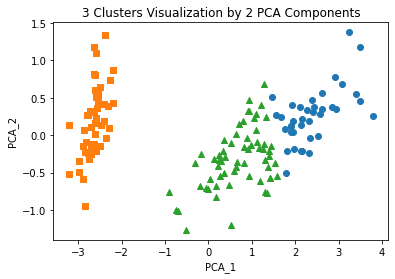

In [25]:
marker0 = df[df['cluster'] == 0].index
marker1 = df[df['cluster'] == 1].index
marker2 = df[df['cluster'] == 2].index

plt.scatter(x=df.loc[marker0, 'pca_x'], y=df.loc[marker0, 'pca_y'], marker='o')
plt.scatter(x=df.loc[marker1, 'pca_x'], y=df.loc[marker1, 'pca_y'], marker='s')
plt.scatter(x=df.loc[marker2, 'pca_x'], y=df.loc[marker2, 'pca_y'], marker='^')

plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

1번 군집은 명확히 분리되어 있으며, 0번 군집과 2번 군집도 상당 수준 분리돼 있지만 1번만큼은 아님

### 1.1.3 군집화 알고리즘 테스트를 위한 데이터 생성

- **make_blobs()**는 개별 군집의 중심점과 표준 편차 제어 기능이 있음

    n_samples : 생성할 총 데이터의 개수 (디폴트 100)
    
    n_features : 데이터의 피처 개수
    
    centers : int 값으로 설정하면 군집의 개수, ndarray 형태로 표현하면 개별 군집 중심점의 좌표
    
    cluster_std : 생성될 군집 데이터의 표준 편차 (군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 리스트 형태로 표현)


- **make_classification()**은 노이즈를 포함한 데이터를 만드는 데 유용하게 사용

** 두 API 모두 대표적인 군집화용 데이터 생성기로, 분류 용도로도 테스트 데이터 생성이 가능

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


200개의 레코드와 2개의 피처를 가지고 있으며, cluster 값 [0,1,2]은 각각 균일하게 구성되어 있음

In [27]:
import pandas as pd

df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
df['target'] = y
df.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


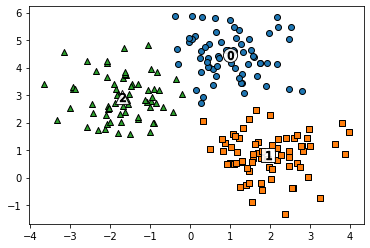

In [28]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
df['kmeans_label'] = cluster_labels

centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 시각화
for label in unique_labels:
    label_cluster = df[df['kmeans_label'] == label]
    center_xy = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    plt.scatter(x=center_xy[0], y=center_xy[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_xy[0], y=center_xy[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

make_blobs()의 target과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있음

In [29]:
print(df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


## 1.2 군집 평가

대부분의 군집화 데이터 세트는 Target 레이블이 없으며, 비지도학습 특성상 정확한 성능을 평가하기 어려움

### 1.2.1 실루엣 분석의 개요

- **실루엣 분석 : 각 군집 간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타냄**

    **sklearn.metrics.silhouette_samples**(X, labels, metric='euclidean', **kwds) : 각 데이터 포인트의 실루엣 계수를 계산해 반환
    
    **sklearn.metrics.silhouette_score**(X, labels, metric='euclidean', sample_size=None, **kwds) : 전체 데이터의 실루엣 계수 값을 평균해 반환
    
    
- 좋은 군집화의 기준 조건

    1) 전체 실루엣 계수의 평균값(사이킷런의 silhouette_score())은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
    
    2) 개별 군집의 평균값의 편차가 크지 않아야 함
    
cf) 실루엣 계수 : 개별 데이터가 가지는 군집화 지표. 같은 군집 내 데이터와 얼마나 가까운지, 다른 군집 데이터와 얼마나 멀리 있는지를 나타냄

### 1.2.2 붓꽃 데이터 세트를 이용한 군집 평가

In [31]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
df = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(df)
df['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함
score_samples = silhouette_samples(iris.data, df['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

# df에 실루엣 계수 칼럼 추가
df['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, df['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
df.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [32]:
df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

1번 군집의 실루엣 계수 값이 약 0.79인데 반해, 다른 군집의 실루엣 계수 값이 낮아 전체 평균 실루엣 계수 값이 약 0.553으로 나타남

### 1.2.3 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

https://github.com/wikibook/ml-definitive-guide/blob/master/7%EC%9E%A5/7-2_Cluster%20evaluation.ipynb

In [34]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링을 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

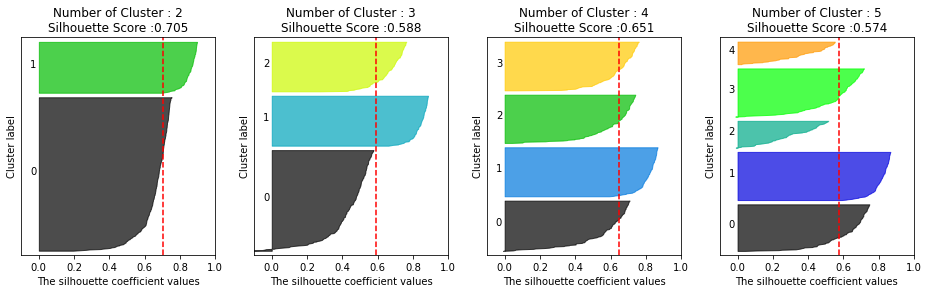

In [35]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10, 10), shuffle=True, random_state=1)

# 군집 개수가 2, 3, 4, 5개일 때의 군집별 실루엣 계수 평균값 시각화
visualize_silhouette([2,3,4,5], X)

군집이 2개인 경우보다 평균 실루엣 계수 값이 작지만, 4개인 경우 개별 군집의 평균 실루엣 계수 값이 비교적 균일하여 가장 이상적임

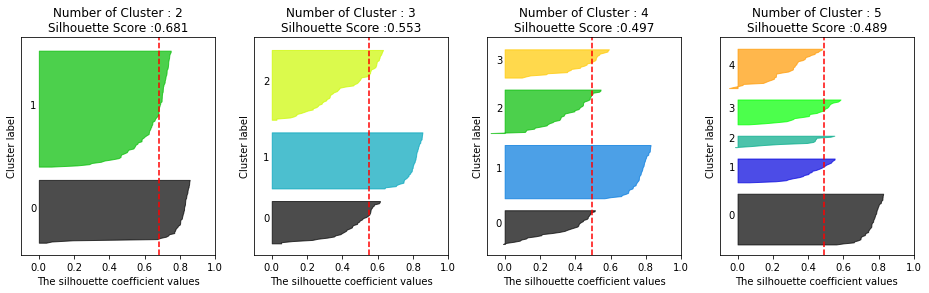

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2,3,4,5], iris.data)

붓꽃 데이터의 경우에는 군집 개수를 2개로 하는 것이 가장 이상적임

실루엣 계수를 통한 K-평균 군집 평가 방법은 직관적으로 이해하기 쉽지만, 데이터 양이 늘어나면 수행 시간이 크게 늘어나는 단점이 있음

메모리 부족 등의 에러가 발생할 경우 군집별로 임의의 데이터를 샘플링해 실루엣 계수를 평가하는 방안을 고민해야 함

## 1.3 평균 이동

## 1.4 GMM(Gaussian Mixture Model)

## 1.5 DBSCAN

## 1.6 군집화 실습 - 고객 세그먼테이션